Loading the imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Loading the video and getting the frames for test

In [2]:
cap = cv2.VideoCapture('Robots.mp4')
success1, frame1 = cap.read()
cap.set(cv2.CAP_PROP_POS_FRAMES, 2)
success2, frame2 = cap.read()

Grayscaling the 2 images to track

In [3]:
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

Finding the features to track with sparse optical flow

In [4]:
feat1 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)
feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None)

Looking at the features tracked

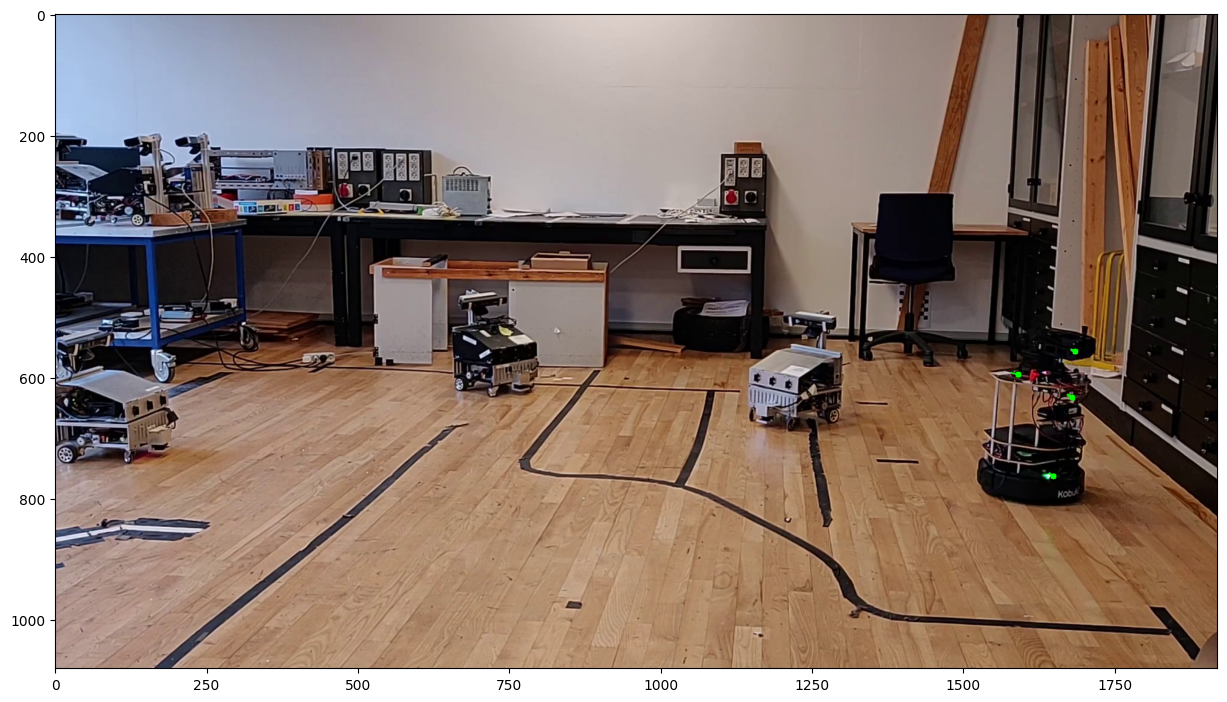

In [5]:
frame2_copy = frame2.copy()

for i in range(len(feat1)):
    f10=int(feat1[i][0][0])
    f11=int(feat1[i][0][1])
    f20=int(feat2[i][0][0])
    f21=int(feat2[i][0][1])
    if np.abs(f10 - f20) < 2 and np.abs(f11 - f21) < 2:
        continue
    cv2.line(frame2_copy, (f10,f11), (f20, f21), (0, 255, 0), 2)
    cv2.circle(frame2_copy, (f10, f11), 5, (0, 255, 0), -1)

plt.figure(figsize=(15,15))
b, g, r = cv2.split(frame2_copy)
frame2_copy = cv2.merge([r, g, b])
plt.imshow(frame2_copy)

Doing the whole thing in a loop

In [6]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 1)
success, frame = cap.read()
frames = [frame]
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cap.set(cv2.CAP_PROP_POS_FRAMES, 2)

while True:
    success, frame = cap.read()
    if not success:
        break
    next_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    feat1 = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.3, minDistance=7)
    feat2, status, error = cv2.calcOpticalFlowPyrLK(gray, next_gray, feat1, None)

    for i in range(len(feat1)):
        f10=int(feat1[i][0][0])
        f11=int(feat1[i][0][1])
        f20=int(feat2[i][0][0])
        f21=int(feat2[i][0][1])
        if np.abs(f10 - f20) < 2 and np.abs(f11 - f21) < 2:
            continue
        cv2.line(frame, (f10,f11), (f20, f21), (0, 255, 0), 2)
        cv2.circle(frame, (f10, f11), 5, (0, 255, 0), -1)

    gray = next_gray.copy()
    frames.append(frame)

Watch the video for sparse optical flow

In [7]:
for image in frames:
    cv2.namedWindow('Frames', cv2.WINDOW_NORMAL)
    cv2.imshow('Frames', image)
    cv2.waitKey(20)
cv2.destroyAllWindows()

Doing the same thing with dense optical flow

In [8]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 1)
success, frame = cap.read()
frames2 = [frame]
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

while True:
    success, frame = cap.read()
    if not success:
        break
    next_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.5, 0)
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1])
    hsv = np.zeros_like(frame)
    hsv[:, :, 0] = ang * 180 / np.pi / 2
    hsv[:, :, 1] = np.ones_like(frame[:, :, 0]) * 255
    hsv[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    gray = next_gray.copy()
    frames2.append(frame + bgr)

Watch the video for dense optical flow

In [9]:
for image in frames2:
    cv2.namedWindow('Frames', cv2.WINDOW_NORMAL)
    cv2.imshow('Frames', image)
    cv2.waitKey(20)
cv2.destroyAllWindows()

Save the video

In [10]:
height, width, _ = frames[0].shape

out = cv2.VideoWriter("Sparse optical flow.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))
for frame in frames:
    out.write(frame)

out2 = cv2.VideoWriter("Dense optical flow.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))
for frame in frames2:
    out2.write(frame)

out.release()
out2.release()
cap.release()